# PYTHON COURSEWORK Data Analysis, Data Visualization & Machine Learning


### Project is done by Oo Lwin

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
import networkx as nx
import random

#Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC



In [21]:
conn = sqlite3.connect('pythoncoursework.db')

In [22]:
c = conn.cursor() #creating an instance to invoker methods that execute SQL statements, fetch data from the result sets of the queries

In [ ]:
data_2000 = pd.read_csv("2000.csv")  #importing year 2000 ontime data into python
data_2001 = pd.read_csv("2001.csv")
airports = pd.read_csv("airports.csv")
plane_data = pd.read_csv("plane-data.csv")
carriers = pd.read_csv("carriers.csv")

In [ ]:
data_2000.to_sql('ontime',con = conn, if_exists='append',index = False) #sending the data from python into database
data_2001.to_sql('ontime',con = conn, if_exists='append',index = False,) #we have to add append as we are into 1 table
airports.to_sql('airports', con = conn, index = False)
plane_data.to_sql('plane_data',con = conn, index = False)
carriers.to_sql('carriers',con = conn, index = False)

## Question 1 : What is the best time to travel?

In [ ]:
#Question 1 Time Answer

In [4]:
q1a = c.execute('''
                  SELECT AVG(ArrDelay + DepDelay) AS Avg_Delay,(CASE 
                  WHEN deptime > 0000 AND deptime <= 0400 THEN 'Midnight'
                  WHEN deptime > 1800 AND deptime <= 2400 THEN 'Evening'
                  WHEN deptime > 1200 AND deptime <= 1800 THEN 'Afternoon'
                  WHEN deptime > 0700 AND deptime <= 1200 THEN 'Morning'
                  when deptime > 0400 AND deptime <= 0700 THEN 'Early Morning' END) AS time
                  FROM ontime
                  WHERE DepDelay >0 AND ArrDelay > 0 AND Cancelled = 0 AND Diverted = 0 AND Deptime != 'NULL'
                  GROUP BY time
                  ORDER BY Avg_Delay''').fetchall()

#Selecting Average of Arrival and Dep Delay which are more than 0, and grouping them into timeframes using CASE.
#GROUPED by time, meaning they will be grouped according to their time, into 5 different groups.
#Ordered by Avg_Delay, from smallest to biggest.

In [5]:
q1adf = pd.DataFrame(q1a,columns=['Avg_Delay','time'])   #changing q1a from a list to a dataframe using pandas.

In [6]:
#Question 1 Time Graph

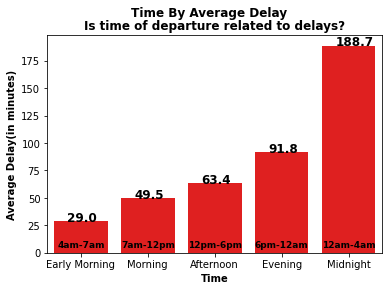

In [7]:
a = sns.barplot(x='time',y='Avg_Delay', data= q1adf        #inserting data and axis variables into the sns barplot. 
           ,order=['Early Morning','Morning','Afternoon','Evening','Midnight'  #Putting the time groups in order.
                  ], color = 'r',ci=None)                    #settting color to red and confidence intervalto none.
         


ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/4, p.get_height(),  #using for loops in order to create values of the bars for readibility.
            '{0:.1f}'.format(p.get_height()),
            fontsize= 12, color='black',fontweight='bold') #adjusting the text adjustments.

plt.title('Is time of departure related to delays?',fontweight='bold')
plt.suptitle('Time By Average Delay',fontweight='bold')                 #Labelling the axis and titles, subtitles.
plt.xlabel('Time',fontweight='bold')
plt.ylabel('Average Delay(in minutes)',fontweight='bold')

plt.text(-0.35,5,"4am-7am",color='black',fontweight='bold',fontsize=9)
plt.text(0.6,5,"7am-12pm",color='black',fontweight='bold',fontsize=9)
plt.text(1.6,5,"12pm-6pm",color='black',fontweight='bold',fontsize=9)       #annotating the Actual time frame of the time.
plt.text(2.60,5,"6pm-12am",color='black',fontweight='bold',fontsize=9)
plt.text(3.6,5,"12am-4am",color='black',fontweight='bold',fontsize=9)


plt.savefig('q1a.png')             #saving the output of the graph into the workspace.



In [8]:
#Question 1 Day Answer

In [9]:
q1b = c.execute('''
                  SELECT (CASE 
                  WHEN DayOfWeek = 1 THEN 'Mon'
                  WHEN DayOfWeek = 2 THEN 'Tue'
                  WHEN DayOfWeek = 3 THEN 'Wed'
                  WHEN DayOfWeek = 4 THEN 'Thu'
                  WHEN DayOfWeek = 5 THEN 'Fri'
                  WHEN DayOfWeek = 6 THEN 'Sat'
                  WHEN DayOfWeek = 7 THEN 'Sun' END) AS DayofWeek,
                  AVG(ArrDelay + DepDelay) AS Avg_Delay
                  FROM ontime
                  WHERE DepDelay > 0 AND ArrDelay >0 AND Cancelled = 0 AND Diverted = 0
                  GROUP BY DayOfWeek
                  ORDER BY Avg_Delay''').fetchall()

In [10]:
q1bdf = pd.DataFrame(q1b,columns=['DayOfWeek','Avg_Delay'])

In [11]:
#Question 1 Day Graph

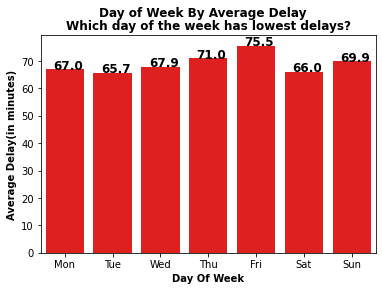

In [12]:
b = sns.barplot(x='DayOfWeek',y='Avg_Delay', data= q1bdf
           ,order=['Mon','Tue','Wed','Thu','Fri','Sat'
                  ,'Sun'], color = 'r')

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/5, p.get_height(),
            '{0:.1f}'.format(p.get_height()),
            fontsize= 12, color='black',fontweight='bold')
    
plt.title('Which day of the week has lowest delays?',fontweight='bold')
plt.suptitle('Day of Week By Average Delay',fontweight='bold')
plt.xlabel('Day Of Week',fontweight='bold')
plt.ylabel('Average Delay(in minutes)',fontweight='bold')

plt.savefig('q1b.png')

In [13]:
#Question 1 Month Answer

In [14]:
q1c = c.execute('''
                 SELECT (CASE 
                  WHEN month = 1 THEN 'Jan'
                  WHEN month = 2 THEN 'Feb'
                  WHEN month = 3 THEN 'Mar'
                  WHEN month = 4 THEN 'Apr'
                  WHEN month = 5 THEN 'May'
                  WHEN month = 6 THEN 'Jun'
                  WHEN month = 7 THEN 'Jul'
                  WHEN month = 8 THEN 'Aug'
                  WHEN month = 9 THEN 'Sep'
                  WHEN month = 10 THEN 'Oct'
                  WHEN month = 11 THEN 'Nov'
                  WHEN month = 12 THEN 'Dec' END) AS month, Avg(ArrDelay + DepDelay) AS Avg_Delay
                 FROM ontime 
                 WHERE DepDelay >0 AND  ArrDelay >0 AND Cancelled=0 AND Diverted=0 
                 GROUP BY month 
                 ORDER BY Avg_Delay
                 LIMIT 12''').fetchall()

In [15]:
q1cdf = pd.DataFrame(q1c,columns=['month','Avg_Delay'])

In [16]:
#Question 1 Month Graph

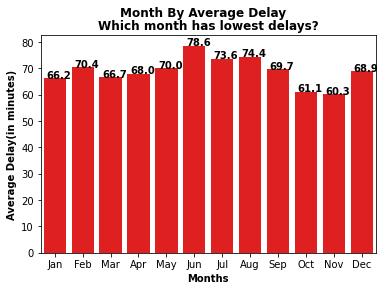

In [17]:
c = sns.barplot(x='month',y='Avg_Delay', data= q1cdf
           ,order=['Jan','Feb','Mar','Apr','May','Jun'
                  ,'Jul','Aug','Sep','Oct','Nov','Dec'], color = 'r')
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/8, p.get_height(),
            '{0:.1f}'.format(p.get_height()),
            fontsize= 10, color='black',fontweight='bold')
    
plt.title('Which month has lowest delays?',fontweight='bold')
plt.suptitle('Month By Average Delay',fontweight='bold')
plt.xlabel('Months',fontweight='bold')
plt.ylabel('Average Delay(in minutes)',fontweight='bold')

plt.savefig('q1c.png')

In [18]:
#Best Time to Travel?

In [19]:
print(f'The best time to travel is on a {str(q1bdf.iloc[0,0])} {(q1adf.iloc[0,1])} in the month of {str(q1cdf.iloc[0,0])}.')

The best time to travel is on a Tue Early Morning in the month of Nov.


### Question 2: Do older planes suffer more delays?

In [23]:
q2 = c.execute('''SELECT (ontime.Year - plane_data.year) AS AGE, AVG(ontime.ArrDelay + ontime.DepDelay) AS Avg_Delay
                  FROM plane_data JOIN ontime ON plane_data.tailnum = ontime.Tailnum
                  WHERE DepDelay >0 AND  ArrDelay >0 AND Cancelled=0 AND Diverted=0 AND plane_data.year < 2002
                  AND plane_data.year != 'None' AND plane_data.year != '' AND ontime.year > plane_data.year
                  GROUP by AGE
                  ORDER BY AGE''').fetchall()

#AGE is calculated by subtracting plane_data.year from ontime.Year. 
#plane_data and ontime is naturally joined using Tailnum.
#Various conditions are added due to missing info in the data,causing inaccurate information.

In [24]:
q2df = pd.DataFrame(q2,columns=['AGE','Avg_Delay'])

In [25]:
#Question 2 Graph

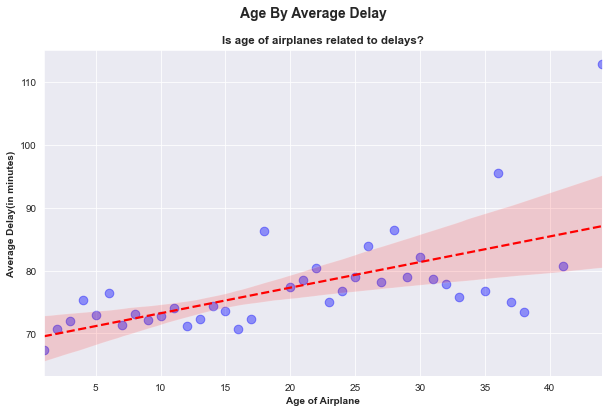

In [26]:
plt.figure(figsize = (10,6))
sns.set_style('darkgrid')       #setting theme with seaborn
d = sns.regplot(x='AGE',y='Avg_Delay',data=q2df,scatter_kws={'s':75,'alpha':0.4,'color':'blue'},line_kws={'linewidth':2.2,'linestyle':'--','color':'r'},ci=95)
sns.set_context('paper', font_scale=1.2)
plt.title('Is age of airplanes related to delays?',fontweight='bold')
plt.suptitle('Age By Average Delay',fontweight='bold')
plt.xlabel('Age of Airplane',fontweight='bold')
plt.ylabel('Average Delay(in minutes)',fontweight='bold')

plt.savefig('q2.png')


### Question 3: How does the number of people flying between different locations change over time?

In [27]:
q3 = c.execute('''SELECT  Year,Origin,Dest, Count(Dest) AS Total
                FROM ontime
                WHERE Cancelled=0 AND Diverted=0 AND ontime.Origin = 'ABE'
                Group BY Origin,Dest,Year
                ORDER BY Origin''').fetchall()

#Query of Q3 is hard coded to show ABE but user can change the Origin in the query to whichever Origin they desire.

In [28]:
q3df = pd.DataFrame(q3,columns=['Year','Origin','Dest','Total'])

In [29]:
#Question 3 Graphs

C:\Users\Rin\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Rin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rin\anaconda3\lib\site-packages\seaborn\categorical.py:1733: UserWarning: You passed a edgecolor/edgecolors ([(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]) for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,
C:\Users\Rin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass

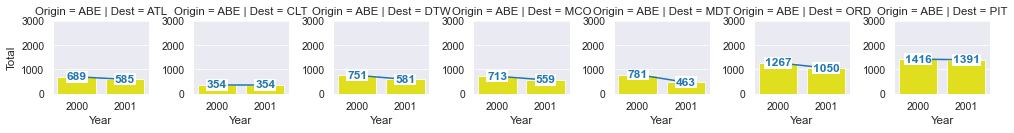

In [30]:

sns.set_style('darkgrid')
e = sns.FacetGrid(q3df, col='Dest',row='Origin',sharey=False,ylim=(0,3000),size = 2) #facetgrid allows to show many graphs at once. 
e.map_dataframe(sns.barplot,x='Year',y='Total',color='yellow')    #setting the axis labels and color of each individual graph.


def f(x,y, **kwargs):                  #creating a function in order to create values on the bars in the facet grid graphs.
    ax = sns.pointplot(x,y,**kwargs)    #using kwargs to handle named arguments in the function.                                   
    for i in range(len(x)):             #using for loops to loop for the numbers of items in x.
        ax.annotate(str(y.values[i]), xy=(i, y.values[i]),fontsize=12,
                color=kwargs.get("color","k"), 
                bbox=dict(pad=.9,alpha=1, fc='w',color='none'),
                va='center', ha='center',weight='bold')

e.map(f,'Year','Total',scale=.7, markers="")


plt.savefig('q3.png')
    


### Question 4: Can you detect cascading failures as delays in one airport create delays in others?

In [31]:
#Question 4 Answer

In [32]:
q4 = c.execute('''SELECT DepDelay,ArrDelay
                 FROM ontime
                 WHERE DepDelay >0 AND ArrDelay >0 AND Diverted = 0 AND Cancelled = 0
                 GROUP BY DepDelay 
                 ORDER BY DepDelay ASC''').fetchall()


In [33]:
q4df = pd.DataFrame(q4,columns=['DepDelay','ArrDelay'])

In [34]:
#Question 4 Graph

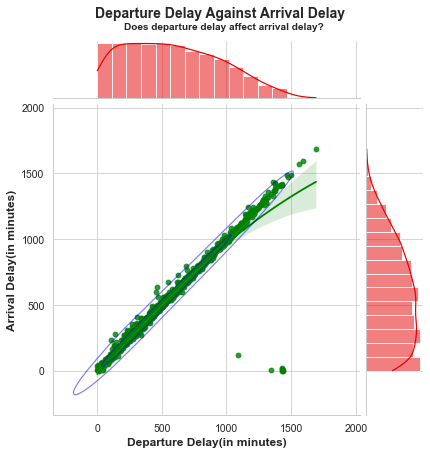

In [35]:
sns.set_style('whitegrid')                         #setting theme for seaborn plot
f = sns.jointplot(x=q4df.DepDelay,y=q4df.ArrDelay,               #setting axis for x and y
                  kind='reg', color='green',space=0.1,           #adding type of plots such as regression , kws and marginal kws
                  joint_kws={'ci':95,'order':2},                 #confidence interval set to  95% , and ordered to 2
                 marginal_kws={'color': 'xkcd:red',})

f.plot_joint(sns.kdeplot, color='blue', levels=3,alpha =0.5)      # 3 levels of kdeplot , with opacity set to 0.5 
f.set_axis_labels('Departure Delay(in minutes)','Arrival Delay(in minutes)',fontsize = 12,
                 fontweight='bold')
f.fig.suptitle('Departure Delay Against Arrival Delay',y=1.05,
              fontweight='bold')
plt.title('Does departure delay affect arrival delay?',
          x=-2.5,y=1.22,fontsize = 10,fontweight='bold')

plt.savefig('q4.png')

### NetworkX (Additional Graph)

In [36]:
q4network = c.execute('''SELECT Origin, Dest, UniqueCarrier, FlightNum
                        FROM ontime
                        WHERE DepDelay > 15 OR ArrDelay > 15 AND Cancelled =0 AND Diverted = 0
                        LIMIT 50000''').fetchall()

In [37]:
q4networkdf = pd.DataFrame(q4network, columns = ['Origin','Dest','Carrier','FlightNum'])

In [38]:
networkdf = q4networkdf[['Origin','Dest','Carrier']]

In [39]:
origindf = networkdf.groupby(['Origin','Carrier']).agg('count').reset_index() #taking all the possible pairs and calculating their frequencies
toporigin = origindf.groupby(['Origin'])['Origin'].agg('count') #taking the recurrences and storing them into the variable
toporigin = toporigin.sort_values(ascending=False)[:50].keys().tolist() #top 50 airports with highest recurrences of flights by carrier

In [40]:
networkdf2 = pd.DataFrame(columns = ['Carrier','Origin1','Origin2'])
carrierdf = networkdf.groupby('Carrier')

for name, group in carrierdf:
    origin = group['Origin'].unique()
    origin = [val for val in origin if val in toporigin]
    if len(origin)>1:
        carriersdf = pd.DataFrame(data = list(combinations(origin,2)),columns=['Origin1','Origin2'])
        carriersdf['Carrier'] = name
        networkdf2 = pd.concat([networkdf2,carriersdf])

In [41]:
networkdf2 = networkdf2.groupby(['Origin1','Origin2']).agg('count').reset_index().rename(columns = {'Carrier':'weight'})
networkdf2 = networkdf2.sort_values(by = 'weight',ascending = False)

#constructing the final network

In [42]:


G = nx.Graph()

for index, row in networkdf2.iterrows():
    G.add_edge(row['Origin1'],row['Origin2'],weight=row['weight'])
    
remove = [node for node,degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)

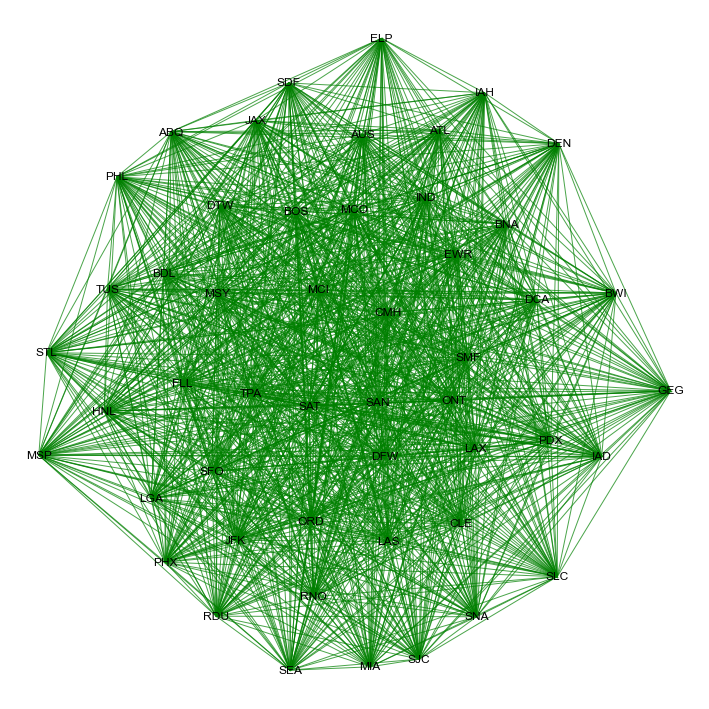

In [43]:
options = {
    'node_color': 'green',
    'edge_color': 'green',
    'node_size': 1,
    'width' :1,
    'alpha': 0.7,
}

plt.subplots(figsize=(10,10))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=10,**options)
nx.draw_networkx_labels(G,pos)
plt.tight_layout()
plt.axis('off');

plt.savefig('q4network.png')

### Question 5: Use the available variables to construct a model that predicts delays.

### Machine Learning Linear Regression vs Random Forest Regression


In [35]:
q5 = c.execute('''SELECT DayofWeek,ArrDelay,DepDelay,TaxiIn,TaxiOut,Distance
                  FROM ontime
                  WHERE DepDelay >0 AND ArrDelay >0 AND Diverted = 0 AND Cancelled = 0
                  GROUP BY DepTime
                  ORDER BY DepTime
                  ''').fetchall()

In [36]:
q5df = pd.DataFrame(q5,columns=['DayofWeek','ArrDelay','DepDelay','TaxiIn','TaxiOut','Distance']) 

In [37]:
x = q5df.drop(['DepDelay'], axis=1).values    #changing from dataframes to arrays
y = q5df['DepDelay'].values

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.30     #assiging the arrays x and y into the traintestsplit
                                                ,random_state=100)      #assigning randomstate 100 for consistency, test_size set to 30%


### Linear Regression

In [45]:
ml= LinearRegression()          #assigning short length variable for LinearRegression.
ml.fit(x_train,y_train)         #fitting the two training sets into the linear regression. 

LinearRegression()

In [46]:
y_pred = ml.predict(x_test)     #predicting the result of the variables 
print(y_pred)

[ 1.78238800e+01  1.04402634e+01  2.18297371e+01  1.56053478e+01
  1.07571015e+01  1.97348312e+01  8.50823879e+02  3.20385711e+01
  2.48088556e+02  3.24112343e+00  7.86414038e+00  1.25591148e+02
  8.08808882e+01  4.10314597e+00  3.82249485e+02  4.71501896e+02
  2.28366119e+01  1.91262039e+01  1.20081350e+02  1.68609611e+01
  1.79357093e+02  9.78961968e+00  1.42706716e+02  5.32538945e+00
  3.83541953e+01  5.92139074e+01 -3.84772563e-01  1.35511977e+01
  3.24992047e+01  6.86852559e+01  1.52116425e+00  3.58524095e+02
  2.07498297e+01  1.39214783e+02  1.88822187e+01  5.90347636e+01
  1.85601613e+01  9.93094408e+00  6.50743537e+02  4.13527189e+01
  2.28488173e+01  2.98802056e+01  7.81195566e+01  6.60888605e+01
  3.98711425e+01  5.95127625e+01  1.78875380e+01  4.03823350e+00
  1.01889967e+01  1.31726103e+02 -8.60939319e+00  2.93267920e+02
  6.72808025e+01  2.00676546e+01  1.78531560e+02  1.78648722e+01
  2.25214149e+01  1.17696547e+02  1.75807897e+01 -8.73040354e-01
  1.28082419e+02  3.87941

In [47]:
predicted_value = ml.predict([[1,9,6,3,3]])  #assigning my own values to the variables to predict. 


if predicted_value >0 and predicted_value <15:
    print("The predicted Departure Delay is :", predicted_value.round(decimals=2), "minutes. Delays below 15 minutes are regarded as on time because it is still within the grace period.")
elif predicted_value <0:
    print("There is no Departure Delay.")           #setting conditions for print from the predicted values. 
    
else:
    print("The predicted Departure Delay is :", predicted_value.round(decimals=2), "minutes.")

The predicted Departure Delay is : [16.34] minutes.


In [48]:
accuracy= r2_score(y_test, y_pred)          #using r2score to test the accuracy of the model, and rounding up result to 2 decimal
print("The accuracy of this model is : ",round(accuracy*100,2), "%")

The accuracy of this model is :  99.26 %


In [49]:
mse = mean_squared_error(y_test,y_pred)        #using scikit learn package to calculate for the mse.
print("The Mean Squared Error of this model is : ",round(mse,2))

The Mean Squared Error of this model is :  89.36


C:\Users\Rin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


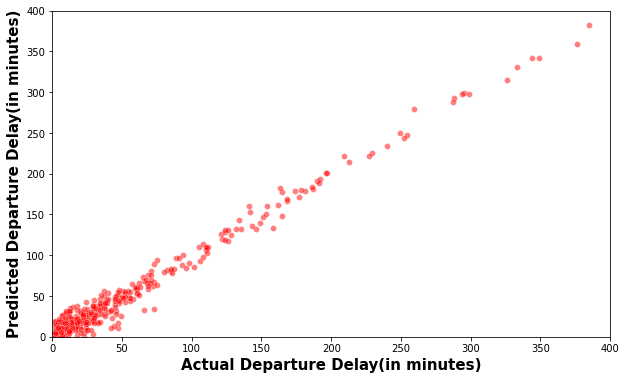

In [50]:
plt.figure(figsize = (10,6))
sns.scatterplot(y_test,y_pred,alpha = 0.5,color= 'red',) #actual vs predicted result of the delay
plt.xlabel("Actual Departure Delay(in minutes)",fontweight='bold',fontsize= 15)
plt.ylabel("Predicted Departure Delay(in minutes)",fontweight='bold',fontsize=15)
plt.ylim(0,400)             #limiting the x and y axis at 400,since there is only few values outside of 400
plt.xlim(0,400)

plt.savefig('q5.png')

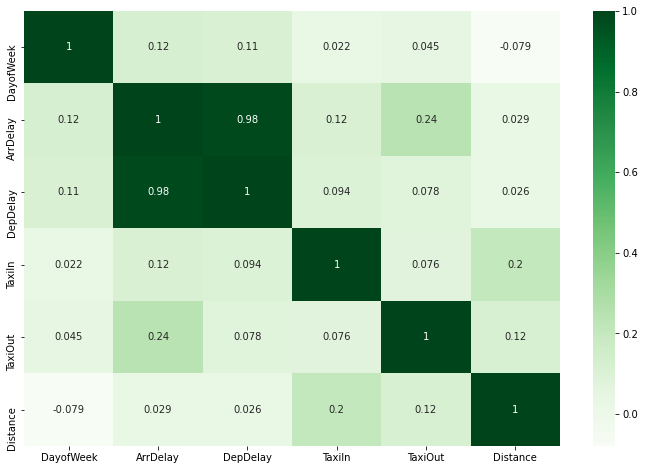

In [51]:
plt.figure(figsize = (12,8))
sns.heatmap(q5df.corr(), cmap="Greens",annot=True)  #plotting heatmap for correlation and setting the hue to green based on intensity
plt.savefig('q5p.png')
# show heatmap of vars for comparison

### Random Forest Regression 

In [52]:
rf = RandomForestRegressor()   #assigning a variable to RandomForestRegressor to rf for easier calling of the function.

In [53]:
rf.fit(x_train,y_train) #fitting the previously stated x and y models into 

RandomForestRegressor()

In [54]:
rf_y_pred = rf.predict(x_test) #fitting the x test into random forest ML model 

In [55]:
accuracy= r2_score(y_test, rf_y_pred)  #using r2 score to check the accuracy of the RF test
print("The accuracy of this model is : ",round(accuracy*100,2), "%") # rounding up and converting the result into a percentage.

The accuracy of this model is :  98.33 %


In [58]:
rf_mse = mean_squared_error(y_test,rf_y_pred) #checking mse 
print("The Mean Squared Error of this model is : ",round(rf_mse,2)) #round up the mse result

The Mean Squared Error of this model is :  201.4


### Hence, Linear Regression is much more accurate since it has a higher accuracy rate and lower mean squared error.

# Classification with ROC Curve

In [9]:
q5roc = c.execute('''SELECT Year,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,TailNum,TaxiIn,TaxiOut,Distance
                  FROM ontime
                  WHERE Diverted = 0 AND Cancelled = 0 AND DepDelay IS NOT NULL 
                  AND ArrDelay IS NOT NULL
                  LIMIT 100000
                  ''').fetchall()

#Fetching the variables we will use to predict if there will be a delay or not.
#Limited to 100000 as my computer takes very long to load the the huge query into machine learning models.

In [10]:
q5delayclass = c.execute('''SELECT (CASE WHEN DepDelay OR ArrDelay > 0 THEN 1
                  WHEN DepDelay OR ArrDelay <= 0 THEN 0 END) AS delayclass
                  FROM ontime
                  WHERE Diverted = 0 AND Cancelled = 0 AND DepDelay IS NOT NULL 
                  AND ArrDelay IS NOT NULL
                  LIMIT 100000
                  ''').fetchall()

#Assigning 1 and 0 if there is any form of dely ( Arrival or Departure), If Departure or Arrival Delay  > 0 then
#it is considered as late (1), else it is considered NOT LATE which is 0, rows with NULL values are removed 
#as we only want to have 1 or 0 in the Delayclass column
##Limited to 100000 as my computer takes very long to load the the huge query into machine learning models.

In [11]:
q5rocdf = pd.DataFrame(q5roc,columns=['Year','DayofMonth','DayOfWeek','DepTime','ArrDelay','DepDelay','Origin','TailNum','TaxiIn','TaxiOut','Distance'])
q5delayclassdf = pd.DataFrame(q5delayclass,columns=['delayclass'])

#converting to dataframe

In [12]:
combined_results = pd.concat([q5rocdf,q5delayclassdf],axis=1)
combined_results.head()

#combining the two dataframes together use concatnation

,Year,DayofMonth,DayOfWeek,DepTime,ArrDelay,DepDelay,Origin,TailNum,TaxiIn,TaxiOut,Distance,delayclass
0,2000,28,5,1647.0,7.0,0.0,ATL,N808AW,15,11,1587,1
1,2000,29,6,1648.0,40.0,1.0,ATL,N653AW,5,47,1587,1
2,2000,31,1,1645.0,-7.0,-2.0,ATL,N806AW,7,14,1587,1
3,2000,1,6,842.0,-4.0,-4.0,ATL,N158AW,3,8,1587,1
4,2000,2,7,849.0,47.0,3.0,ATL,N656AW,8,24,1587,1


In [13]:
#pipelines pre-processing 
features = ['DayOfWeek','DepTime','ArrDelay','DepDelay','Origin', 'TailNum','Distance']
X = combined_results[features].copy()


In [14]:
numerical_features = ['DayOfWeek','DepTime','ArrDelay','DepDelay','Distance']

#Applying SimpleImputer and StandardScaler into a pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())])

categorical_features = ['Origin', 'TailNum']

#Applying SimpleImputer and then OneHotEncoder for creation of dummy variables onthe features into another pipeline.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#put everything together according to numerical or categorical
data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,q5delayclassdf, test_size=0.7,random_state=1)
#creation of training and test set, using function train test split,random_state set to 1 for get same answer

In [16]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

#fill up the empty data with mean or median for numerical
#fill up the empty data with a constant value or most frequently appeared value for categorical.

In [17]:
y_train = y_train.values.ravel()  #setting y_train_values.ravel() to change from multidimensional array to 1D array

In [24]:
pipe_lr  = Pipeline(steps=[('data_transformer', data_transformer),
                      ('pipe_lr', LogisticRegression(max_iter=10000, random_state=0,penalty = 'none'))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);

#extending the results to Logistic Regression
#performing GridSearch Cross Validation when we train the data
#fit the model to train the input and the output 

In [25]:
pipe_svm = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_svm',  LinearSVC(random_state=0, max_iter=10000, tol=0.01))])
grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid)
grid_svm.fit(X_train, y_train);

#extending the results to Service Vector Machine

In [26]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
       ('pipe_gdb',GradientBoostingClassifier(random_state=0))])

grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(X_train, y_train);

#extending the results to Gradient Boosting

In [27]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_rf', RandomForestClassifier(random_state=0))])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(X_train, y_train);

#extending the results to Random Forest

In [31]:
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_plr', LogisticRegression(penalty='l1', max_iter=10000, tol=0.01, solver='saga'))])
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
grid_plr.fit(X_train, y_train);

#extending the results to Penalised Logistic Regression

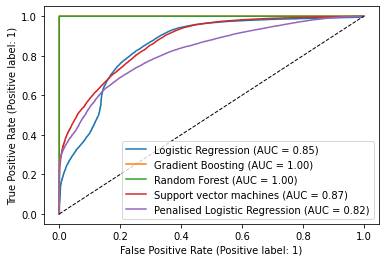

In [34]:
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plot_roc_curve(grid_rf, X_test, y_test, ax=ax, name='Random Forest')
plot_roc_curve(grid_svm, X_test, y_test, ax=ax, name='Support vector machines')
plot_roc_curve(grid_plr, X_test, y_test, ax=ax, name='Penalised Logistic Regression')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')


#plotting the roc curve of various machine learning models and comparing which one is better.

### Gradient Boosting and Random Forest is the best models with both having a AUC score of 1.00 whereas Penalised Logistic Regression is the worst model with only a 0.82 AUC score. Hence, Random Forest and Gradient Boosting can be chosen depending on the use of the model as both of these models have their own advantages and disadvantages according to situation. 